<a href="https://colab.research.google.com/github/dyou-wbg/meta_processing/blob/main/AllTitles_AllAbstract.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
# as of today
import datetime as dt
dt.date.today()
import os
import pandas as pd
from google.colab import drive
import csv
import os


Mounted at /content/drive


In [3]:
directory = '/content/drive/MyDrive/finalMetaFile'

df = pd.read_csv(os.path.join(directory, 'scopus_fixed_encoding.csv'),nrows=100)
df.columns

Index(['Unnamed: 0', 'scopus_ID', 'abstract', 'coverDate', 'aggregationType',
       'url', 'source-id', 'citedby-count', 'title', 'openaccess',
       'subtypeDescription', 'publicationName', 'doi', 'abstract.1',
       'language'],
      dtype='object')

In [8]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)


<ipython-input-8-1390d13c0cdd>:4: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


In [4]:
directory = '/content/drive/MyDrive/finalMetaFile'

df = pd.read_csv(os.path.join(directory, 'scopus_fixed_encoding.csv'))
#df.rename(columns={"abstracts": "abstract"}, inplace=True)
df.rename(columns={"description": "abstract"}, inplace=True)
df.to_csv(os.path.join(directory, 'scopus_fixed_encoding.csv'), index=False)


final_file_list = [ 'scopus_fixed_encoding.csv', 'elsevier_metadata.csv',
                    'url1_ie_table_complete.csv', 'metadata_econlit.csv']

In [5]:

def get_column_names(file_list, directory):
  column_names = {}
  for filename in file_list:
    filepath = os.path.join(directory, filename)
    df = pd.read_csv(filepath)
    column_names[filename] = list(df.columns)
  return column_names

column_names = get_column_names(final_file_list, directory)

for filename, columns in column_names.items():
  print(f"Columns in {filename}:")
  print(*columns, sep=", ")
  print()


Columns in scopus_fixed_encoding.csv:
Unnamed: 0, scopus_ID, abstract, coverDate, aggregationType, url, source-id, citedby-count, title, openaccess, subtypeDescription, publicationName, doi, abstract.1, language

Columns in elsevier_metadata.csv:
Unnamed: 0, id, type, title, abstract, keywords, authors, date, url, journal, downloaded

Columns in url1_ie_table_complete.csv:
Unnamed: 0, id, title, author, sector, country, URL, pub_time, pub, open_access, category, abstract, panels, source_url

Columns in metadata_econlit.csv:
recordID, pdfLink, plink, shortDbName, journal, pub_date, doi, title, author, abstract, Unnamed: 0.1



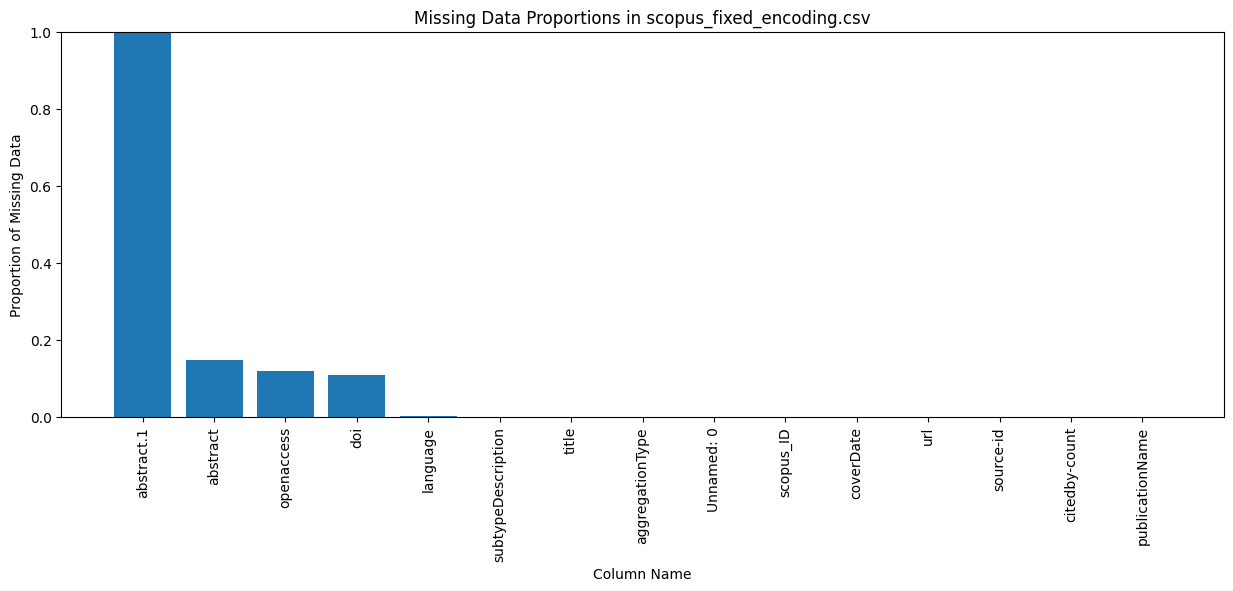

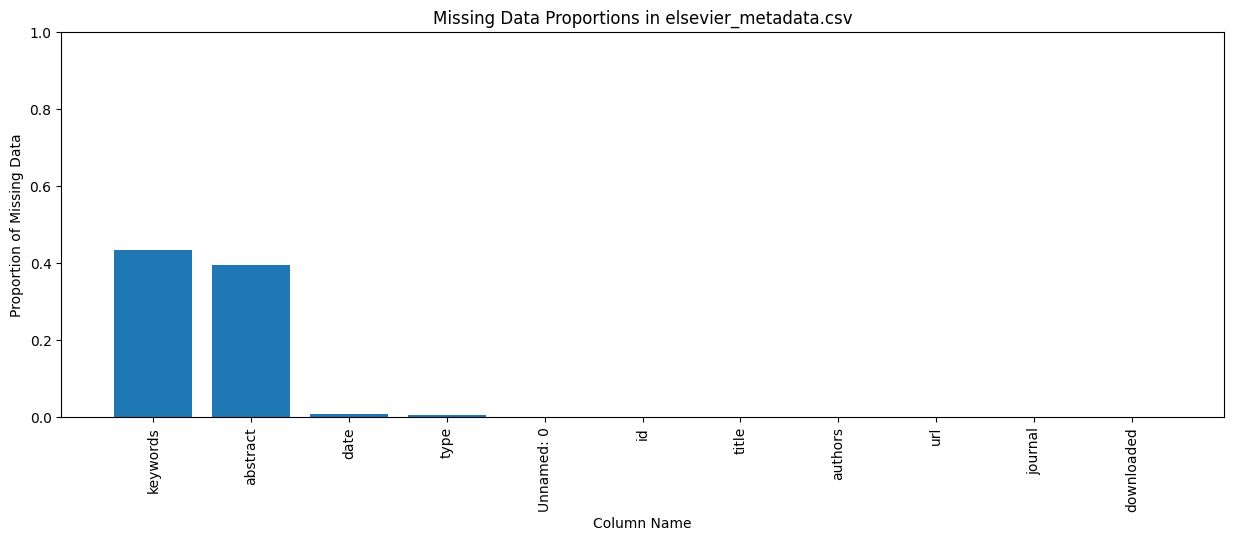

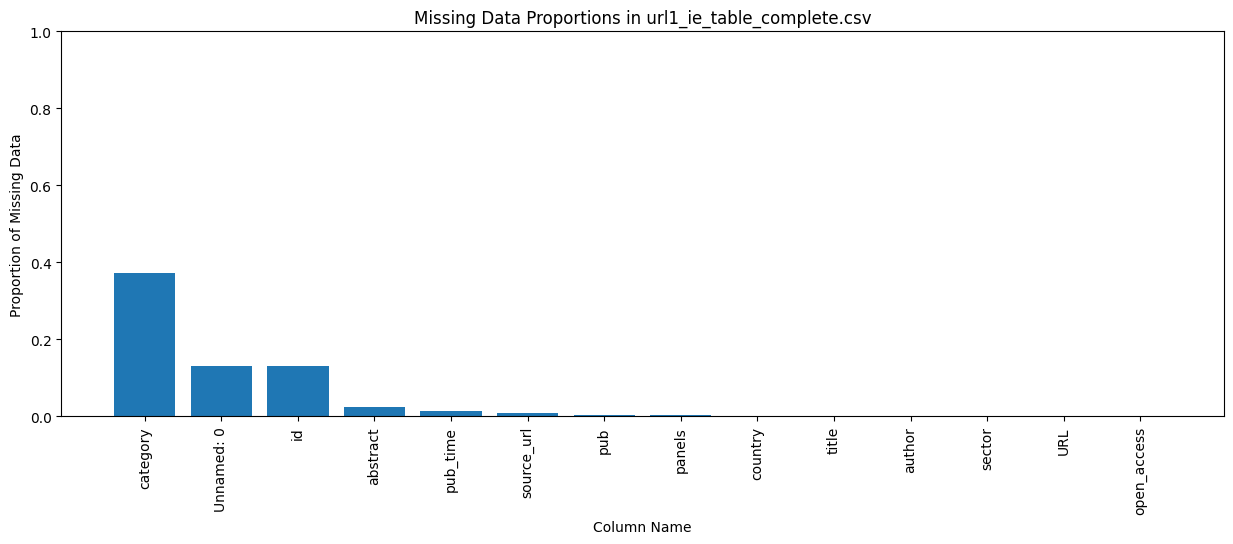

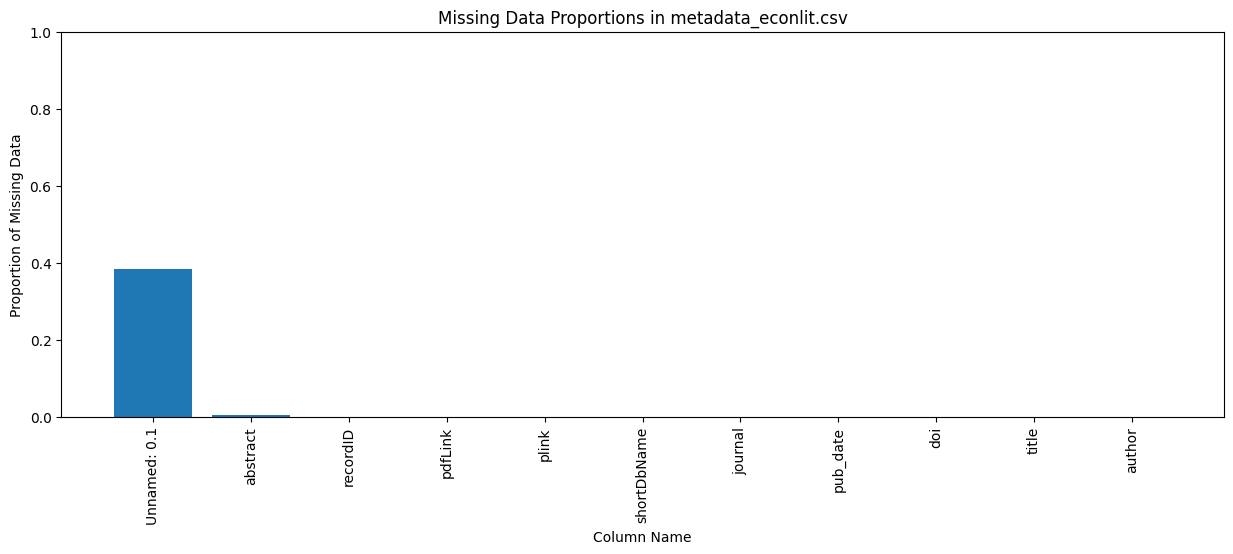

In [8]:

import matplotlib.pyplot as plt

def plot_missing_data_proportions(file_list, directory):
  for filename in file_list:
    filepath = os.path.join(directory, filename)
    df = pd.read_csv(filepath)
    missing_data_proportions = df.isna().mean().sort_values(ascending=False)

    plt.figure(figsize=(15, 5))
    plt.bar(missing_data_proportions.index, missing_data_proportions.values)
    plt.xlabel("Column Name")
    plt.xticks(rotation=90)
    plt.ylabel("Proportion of Missing Data")
    plt.ylim(0,1)
    plt.title(f"Missing Data Proportions in {filename}")
    plt.show()

plot_missing_data_proportions(final_file_list, directory)


In [11]:
dataframes = []

for filename in final_file_list:
    if os.path.isfile(os.path.join(directory, filename)) and filename.endswith(".csv"):
        df = pd.read_csv(os.path.join(directory, filename))
        if "title" in df.columns:
            df_final = df[['title','abstract']]
        elif 'doc_name' in df.columns:
            df_final = df[['doc_name','abstract']]
        else:
            print(f"Missing required column in file: {filename}")
            continue
        dataframes.append(df_final)

        total_rows = len(df_final)
        rows_with_abstract = df_final['abstract'].notna().sum()
        percentage = (rows_with_abstract / total_rows) * 100
        print(f"File: {filename}, Percentage of rows with abstract: {percentage:.2f}%")

#combined_df = pd.concat(dataframes, ignore_index=True)
#combined_df.to_csv('/content/drive/MyDrive/All_titles_abstracts.csv', index=False)


File: scopus_fixed_encoding.csv, Percentage of rows with abstract: 85.18%
File: elsevier_metadata.csv, Percentage of rows with abstract: 60.47%
File: url1_ie_table_complete.csv, Percentage of rows with abstract: 97.62%
File: metadata_econlit.csv, Percentage of rows with abstract: 99.46%
